In [1]:
import numpy as np

data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]
data = np.array(data)
print(data[:,0]) #[1 4 7]
print(data[1,:]) #[4 5 6]
print(data[:, 1:]) 
# [[2 3]
#  [5 6]
#  [8 9]]
print(data[:, -1]) #[3 6 9]
print(data[:, :-1]) 
# [[1 2]
#  [4 5]
#  [7 8]]

[1 4 7]
[4 5 6]
[[2 3]
 [5 6]
 [8 9]]
[3 6 9]
[[1 2]
 [4 5]
 [7 8]]


In [4]:
import numpy as np
import torch

a = np.arange(1,5)
a = torch.from_numpy(a)
'''
tensor([1, 2, 3, 4])
torch.Size([4])

tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])

tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
'''
print(a) #[1,2,3,4]
print(a.shape) #(4,)

'''[[1]
 [2]
 [3]
 [4]]
 '''
print(a[:,None]) 
print(a[:,None].shape) # (4,1)

print(a[...,None])
print(a[...,None].shape) # (4,1)

print(a[None,:]) # [[1,2,3,4]]
print(a[None,:].shape) # (1,4)

tensor([1, 2, 3, 4])
torch.Size([4])
tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])
tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])
tensor([[1, 2, 3, 4]])
torch.Size([1, 4])


In [ ]:
# Add a batch dimension:  它会在索引为 0 的位置上插入一个维度。
# 需要对张量进行运算或与其他张量进行操作时，需要调整张量的维度匹配。
# 例如，将一维张量作为输入传递给大小为 (batch_size, ...) 的神经网络，就通常需要在维度上插入一个批次大小的维度。
input_tensor = input_tensor.unsqueeze(0)

### 在Numpy中,看到了@符号,但是无论是google搜索或者baidu搜索,由于@符号是一个特殊字符,所以很难检索到答案。
其实很简单,他就是Numpy库中的一个操作符,在numpy库的说明中,落在numpy.matmul1的条目中。
在Python 3.5之后引入,用以执行numpy.matmul。

说起matmul函数,顾名思义就是矩阵乘法,这个函数其实是大名鼎鼎的numpy.dot点乘的一个子集。

根据dot函数2的说明,numpy.dot(a, b, out=None)用于两个数组的点乘：

- 若a和b都是 1-D 一维数组,它就计算 向量的内积inner product
- 若a和b都是 2-D 二维数组,它就执行 矩阵乘法matrix multiplication, 此时更推荐使用matmul函数,或使用 a@b
- 如果a或b是 0-D (标量) ,它相当于 乘法multiply,  此时推荐使用numpy.multiply(a, b)或a * b


In [ ]:
#####  数组 --> 图像
# obj (numpy.ndarray): 一个二维numpy数组, 表示要转换为图像的数组。
# mode (str): 一个字符串, 表示输出图像的模式。常用的模式有 “L” (灰度图), “RGB” (彩色图), “CMYK” (Cyan, Magenta, Yellow, blacK)。 如：
Image.fromarray(renormalize_cam_in_bounding_boxes(boxes, image_float_np, grayscale_cam))

## torch.tensor  .numpy()、.item()、.cpu()、.clone()、.detach()及.data的使用

In [3]:
import torch 
## .item()
'''
将一个Tensor变量转换为python标量(int float等单个的数值, 但是不能是数组)
常用于深度学习训练时, 将loss值转换为标量并加,
以及进行分类任务,计算准确值时需要（如例一）。 
item()是可以直接从gpu上转换为标量,看下面例一的loss.item() && 例二 运行结果。
'''
# 例一  在gpu上运行 计算loss值和acc值
optimizer.zero_grad()
outputs = model(data)
loss = F.cross_entropy(outputs, label)
acc = (outputs.argmax(dim=1) == label).sum().cpu().item() / len(labels)     #这里也用到了.item(),可以先转换到cpu
loss.backward()
optimizer.step()
train_loss += loss.item()   #这里用到了.item()，也可以直接item()
train_acc += acc

# 例二
a = torch.tensor([5],requires_grad=True,dtype=torch.float64,device='cpu')
print(a)
b = a.item()
print(b)

tensor([5.], dtype=torch.float64, requires_grad=True)
5.0


In [5]:
# .cpu() 
'''
将数据的处理设备从其他设备（如.cuda()拿到cpu上）
不会改变变量类型,转换后仍然是 Tensor变量。 
为什么需要这一步？ 因为  gpu  上的数组不能直接进行转换类型的操作。
'''
a = torch.tensor([[1,2,3],[4,5,6]],requires_grad=True,dtype=torch.float64).cuda()
# 正确做法
b = a.cpu().detach().numpy()
b    


array([[1., 2., 3.],
       [4., 5., 6.]])

In [7]:
# .numpy()
'''
Tensor.numpy()将 Tensor 转化为 ndarray , 这里的Tensor可以是标量 [即item()的作用 或者 向量 [与item()不同，一般是矩阵，转换前后的dtype不会改变, 
但是要注意能直接 numpy()的tensor 的前提是没有梯度· requires_grad=False 的。
若有梯度 比如requires_grad=True,或者在神经网络的前向传播过程中）则需要 先 .detach()再进行 numpy()。 
在后面还会讲解.detach()作用。
'''
a = torch.tensor([[1.,2.]])
a_numpy = a.numpy() #[[1., 2.]]
a_numpy
a = torch.tensor(1.5)
a_numpy = a.numpy() #1.5
a_numpy


array(1.5, dtype=float32)

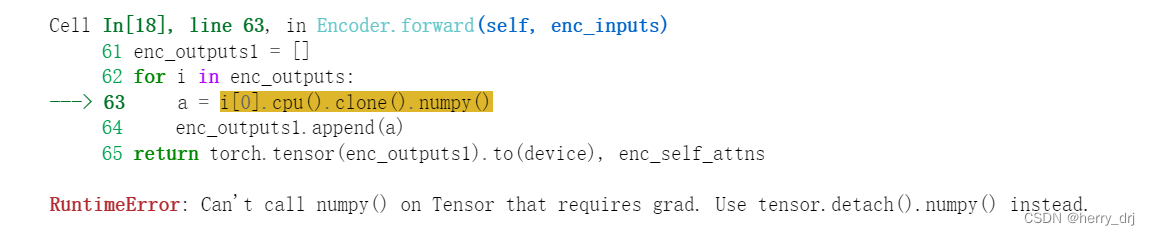

In [8]:
# .clone()
'''
可以返回一个完全相同的tensor,新的tensor开辟新的内存, 但是仍然留在计算图中。
**所以它复制完会保留原来的梯度, 原来有梯度那么clone完也是有梯度的。**
!!!!!!!!!!!!!!!!!  而 没有梯度 又可以直接用.numpy()转换为数组，用.clone()也不行，这个暂时感觉用的很少。
'''
# 下列是有梯度不能用numpy() 的一个错误案例。在前向传播过程中.clone()依旧有梯度，所以不可numpy()
from IPython.display import Image, display
 
img_path = './clone&numpy_error.png'
display(Image(filename=img_path))


In [ ]:
# .detach()
'''
可以返回一个完全相同的tensor, 新的tensor开辟与旧的tensor共享内存
新的tensor会脱离计算图,不会牵扯梯度计算。也就是requires_grad=False, 
因此可以 接着进行numpy() 的操作, 解决了numpy()需要建立在无梯度的tensor的基础上的问题。
'''
# 举例1：前向传播过程中，如果在传播过程中用.detach()生成了新的变量，然后用这个新的变量继续往下传播，
# 这样会导致梯度反向传播到这里就不能继续，前面的参数也不会发生改变了。

# enc_outputs ： 前向传播产生的变量
# enc_outputs1 ： 过程中自己生成的变量
for i in enc_outputs:
    a = i[0].cpu().detach().numpy()
    enc_outputs1.append(a)
return torch.tensor(enc_outputs1).to(device), enc_self_attns
# 进行训练的时候enc_outputs1脱离了计算，不进行反向传播了


# 举例2： 当model不希望更新某部分的参数的时候，就可以用.detach()一下，如下例子:
#  如果 A网络 的输出被喂给 B网络 作为输入， 如果我们希望在梯度反传的时候只更新 B 中参数的值，而不更新A中的参数值，这时候就可以使用.detach()
a = A(input)
a = a.deatch() # 或者a.detach_()进行in_place操作
out = B(a)
loss = criterion(out, labels)
loss.backward()

.data 是一个属性，而.detach()是一个方法；
.data 是不安全的，.detach()是安全的。

In [9]:
# .data() 
'''
tensor.data 返回和 x 的相同数据 tensor,而且这个新的tensor和原来的tensor是共用数据的,
一者改变,另一者也会跟着改变,而且新分离得到的 tensor的requires_grad = False, 即不可求导的。(这一点其实detach是一样的)
'''
a = torch.tensor([1.0], requires_grad=True)
b = a.data
print(b, b.requires_grad)

tensor([1.]) False


## Tensor 类型转换
- CPU和GPU的Tensor之间转换 : 多用于将数据从 gpu() 转到 cpu() ，因为gpu上的数据不能直接操作
    - data.cuda()： cpu –> gpu
    - data.cpu()：  gpu –> cpu

- Tensor 与 Numpy Array之间的转换：
    - data.numpy()：           Tensor –> Numpy.ndarray
        但是要注意此时需要转换的data是否有梯度，   

    - torch.from_numpy(data)：  Numpy.ndarray –> Tensor 
        将numpy.ndarray 转换为pytorch的 Tensor。 
        返回的张量 tensor 和 numpy 的 ndarray 共享同一内存空间。修改一个会导致另外一个也被修改。返回的张量不能改变大小。


    #### 将tuple 与 Numpy Array 之间的转换
        - tuple(nparray.tolist())      numpy array -> list -> tuple
    
        - np.array(tuple)     tuple -> numpy array

In [11]:
# 1. data有梯度时候,如果直接numpy(),会报错,
a = torch.tensor([[1,2,3],[4,5,6]],requires_grad=True,dtype=torch.float64)
b = a.numpy()
print(b)
# RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

# 正确做法 是先.detach()
b = a.detach().numpy()
b     # array([[1., 2., 3.], [4., 5., 6.]])

# 2. data没有梯度的时候，可以直接numpy()
a = torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float64)
b = a.numpy()
print(b)  # array([[1., 2., 3.],[4., 5., 6.]])

# 3. 若data在gpu上，需要先将数据移动到cpu上，具体操作如下：
a = torch.tensor([[1,2,3],[4,5,6]],requires_grad=True,dtype=torch.float64).cuda()
# 正确做法
b = a.cpu().detach().numpy()
b    # array([[1., 2., 3.],[4., 5., 6.]])


array([[1., 2., 3.],
       [4., 5., 6.]])

    - 

In [1]:
import sys

In [2]:
print(sys.executable)

/Users/rl/anaconda3/envs/torch107/bin/python3.7


# Pytorch的AutoGrad原理


In [2]:
import torch

input = torch.ones([2, 2], requires_grad=False)
w1 = torch.tensor(2.0, requires_grad=True)
w2 = torch.tensor(3.0, requires_grad=True)
w3 = torch.tensor(4.0, requires_grad=True)

l1 = input * w1
l2 = l1 + w2
l3 = l1 * w3
l4 = l2 * l3
loss = l4.mean()


print(w1.data, w1.grad, w1.grad_fn)
# tensor(2.) None None

print(l1.data, l1.grad, l1.grad_fn)
# tensor([[2., 2.],
#         [2., 2.]]) None <MulBackward0 object at 0x000001EBE79E6AC8>

print(loss.data, loss.grad, loss.grad_fn)
# tensor(40.) None <MeanBackward0 object at 0x000001EBE79D8208>


tensor(2.) None None
tensor([[2., 2.],
        [2., 2.]]) None <MulBackward0 object at 0x7fa75d6840d0>
tensor(40.) None <MeanBackward0 object at 0x7fa75d687210>


/Users/rl/anaconda3/envs/torch107/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
/Users/rl/anaconda3/envs/torch107/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.


In [3]:
loss.backward()

print(w1.grad, w2.grad, w3.grad)
# tensor(28.) tensor(8.) tensor(10.)
print(l1.grad, l2.grad, l3.grad, l4.grad, loss.grad)
# None None None None None


tensor(28.) tensor(8.) tensor(10.)
None None None None None


/Users/rl/anaconda3/envs/torch107/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """


In [4]:
input = torch.ones([2, 2], requires_grad=False)
w1 = torch.tensor(2.0, requires_grad=True)
w2 = torch.tensor(3.0, requires_grad=True)
w3 = torch.tensor(4.0, requires_grad=True)

l1 = input * w1
l2 = l1 + w2
l3 = l1 * w3
l4 = l2 * l3
loss = l4.mean()

# 保留中间变量的导数
# 方法1
l1.retain_grad()
l4.retain_grad()
loss.retain_grad()

# # 方法2
# l1.register_hook(lambda grad: print('l1 grad: ', grad))
# l4.register_hook(lambda grad: print('l4 grad: ', grad))
# loss.register_hook(lambda grad: print('loss grad: ', grad))


loss.backward()

print(loss.grad)
# tensor(1.)
print(l4.grad)
# tensor([[0.2500, 0.2500],
#         [0.2500, 0.2500]])
print(l1.grad)
# tensor([[7., 7.],
#         [7., 7.]])


tensor(1.)
tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])
tensor([[7., 7.],
        [7., 7.]])


## in-palce 操作
第一个报错信息：RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: balabala...

- in-place 指的是在不更改变量的内存地址的情况下，直接修改变量的值。

非叶子结点：pytorch 通过检测tensor._version 是否发生了 in-place
叶子结点：尤其对于requires_grad=True 的叶子节点来说，要求更加严格了，甚至在叶子节点被使用之前修改它的值都不行。
    我们来看一个报错信息：
    # RuntimeError: leaf variable has been moved into the graph interior
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.


In [ ]:
a = torch.tensor([10., 5., 2., 3.], requires_grad=True)
print(a, a.is_leaf)
# tensor([10.,  5.,  2.,  3.], requires_grad=True) True

a[:] = 0
print(a, a.is_leaf)
# tensor([0., 0., 0., 0.], grad_fn=<CopySlices>) False

loss = (a*a).mean()
loss.backward()

'''我们看到，在进行对 a 的重新 inplace 赋值之后，表示了 a 是通过 copy operation 生成的，
grad_fn 都有了，所以自然而然不是叶子节点了。
本来是该有导数值保留的变量，现在成了导数会被自动释放的中间变量了，所以 PyTorch 就给你报错了。'''

# # RuntimeError: leaf variable has been moved into the graph interior


In [ ]:
a = torch.tensor([10., 5., 2., 3.], requires_grad=True)
a.add_(10.) # 或者 a += 10.

# RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
'''
这个更厉害了，不等到你调用 backward， 只要你对需要求导的叶子张量使用了这些操作，马上就会报错.
那是不是需要求导的叶子节点一旦被初始化赋值之后，就不能修改它们的值了呢？
我们如果在某种情况下需要重新对叶子变量赋值该怎么办呢？
有办法！
'''

In [ ]:
'''
核心就是修改那个和变量共享内存， 但requires_grad=False的版本值
我们需要注意的是，要在变量被使用之前修改，不然等计算完之后再修改，还会造成求导上的问题，会报错的。
'''
# 方法一   叶子结点张量
a = torch.tensor([10., 5., 2., 3.], requires_grad=True)
print(a, a.is_leaf, id(a))
# tensor([10.,  5.,  2.,  3.], requires_grad=True) True 2501274822696

a.data.fill_(10.)
# 或者 a.detach().fill_(10.)
print(a, a.is_leaf, id(a))
# tensor([10., 10., 10., 10.], requires_grad=True) True 2501274822696

loss = (a*a).mean()
loss.backward()
print(a.grad)
# tensor([5., 5., 5., 5.])

# 方法二
a = torch.tensor([10., 5., 2., 3.], requires_grad=True)
print(a, a.is_leaf)
# tensor([10.,  5.,  2.,  3.], requires_grad=True) True

with torch.no_grad():
    a[:] = 10.
print(a, a.is_leaf)
# tensor([10., 10., 10., 10.], requires_grad=True) True

loss = (a*a).mean()
loss.backward()
print(a.grad)
# tensor([5., 5., 5., 5.])


# Pytorch 的hook机制，及在grad-cam中的应用

## PyTorch（1.1.0版）有如下4个hook：
- torch.Tensor.register_hook (Python method, in torch.Tensor)  
    
    形式： hook(grad) -> return: Tensor or None    
    
    功能：注册一个BP的hook函数，是Tensor类的，当计算Tensor的梯度时自动执行。（因为只有在BP时，tensor才会有梯度，且因为计算结束后释放，所以需要hook）
    
    应用场景举例：在hook函数中可对梯度grad进行in-place操作，即可修改tensor的grad值。
    - 这是一个很酷的功能，例如当浅层的梯度消失时，可以对浅层的梯度乘以一定的倍数，用来增大梯度；
    - 还可以对梯度做截断，限制梯度在某一区间，防止过大的梯度对权值参数进行修改。

In [5]:
import torch

# 如何获取中间变量y的梯度
def grad_hook(grad):
    y_grad.append(grad)

y_grad = list()
x = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)
y = x+1
y.register_hook(grad_hook)
z = torch.mean(y*y)
z.backward()
print("type(y): ", type(y))
print("y.grad: ", y.grad) # None,y是非叶子结点张量，在BP之后就被释放掉节省内存了
'''
在对张量y的hook函数（grad_hook）中，
将y的梯度保存到了y_grad列表中，
因此可以在z.backward()结束后，
仍旧可以在y_grad[0]中读到y的梯度为tensor([0.2500, 0.2500, 0.2500, 0.2500])
'''
print("y_grad[0]: ", y_grad[0]) 



type(y):  <class 'torch.Tensor'>
y.grad:  None
y_grad[0]:  tensor([[1.0000, 1.5000],
        [2.0000, 2.5000]])


/Users/rl/anaconda3/envs/torch107/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if sys.path[0] == "":


In [6]:
# 利用hook函数将变量x的梯度扩大2倍
def grad_hook(grad):
    grad *= 2

x = torch.tensor([2., 2., 2., 2.], requires_grad=True)
y = torch.pow(x, 2)
z = torch.mean(y)
h = x.register_hook(grad_hook)
z.backward()
print(x.grad)
h.remove()    # removes the hook


tensor([2., 2., 2., 2.])


- torch.nn.Module.register_forward_hook (Python method, in torch.nn)
    
    形式：hook(module, input, output) -> None。注意不能修改input和output
    
    功能：Module前向传播中的hook，module在前向传播后，自动调用hook

    应用场景举例：提取特征图

In [8]:
import torch
import torch.nn as nn

class Net(nn.Module): 
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, 3) # 两个卷积核
        self.pool1 = nn.MaxPool2d(2, 2) # 池化为2*2的最大
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        return x
    
def farward_hook(module, data_input, data_output):
    fmap_block.append(data_output)
    input_block.append(data_input) # 是一个 tuple


if __name__ == "__main__":
    # 初始化网络
    net = Net()
    net.conv1.weight[0].data.fill_(1) # 权值为全1
    net.conv1.weight[1].data.fill_(2) # 权值为全2
    net.conv1.bias.data.zero_() # bias设置为0

    # 前向传播之前就 注册hook
    fmap_block = list()
    input_block = list()
    net.conv1.register_forward_hook(farward_hook)

    # inference
    fake_img = torch.ones((1, 1, 4, 4))   # batch size * channel * H * W
    # forward
    output = net(fake_img) 

    # 观察
    print("output shape: {}\noutput value: {}\n".format(output.shape, output))
    print("feature maps shape: {}\noutput value: {}\n".format(fmap_block[0].shape, fmap_block[0]))
    print("input shape: {}\ninput value: {}".format(input_block[0][0].shape, input_block[0]))


output shape: torch.Size([1, 2, 1, 1])
output value: tensor([[[[ 9.]],

         [[18.]]]], grad_fn=<MaxPool2DWithIndicesBackward>)

feature maps shape: torch.Size([1, 2, 2, 2])
output value: tensor([[[[ 9.,  9.],
          [ 9.,  9.]],

         [[18., 18.],
          [18., 18.]]]], grad_fn=<ThnnConv2DBackward>)

input shape: torch.Size([1, 1, 4, 4])
input value: (tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]]),)


- torch.nn.Module.register_forward_pre_hook (Python method, in torch.nn)
    
    形式：hook(module,input)-->none
    
    功能：执行forward之前，调用hook

    应用举例：

- torch.nn.Module.register_backward_hook (Python method, in torch.nn)
    
    形式：hook（module,grad_input,grad_output） -> Tensor  or  None   
        有多个输入输出时，grad_input和grad_output）是一个tuple
    
    功能：module在反向传播中的hook，每次计算module的梯度后，自动调用hook

    应用场景举例：提取特征图的梯度，Grad-CAM对CNN的学习模式进行可视化  （（（（服务器上, ssh lenovo@121.195.169.79   , e706 
    - Grad-CAM 通过对最后一层特征图进行加权求和得到heatmap，整个CAM系列的主要研究就在于这个 加权求和中的权值 从那里来。
    - Grad-CAM 是对特征图进行求梯度，将每一张特征图上的梯度 求平均得到权值（特征图的梯度是element-wise的）。求梯度时并不采用网络的输出，而是采用类向量，即one-hot向量。

In [12]:
# coding: utf-8
"""
通过实现Grad-CAM学习module中的forward_hook和backward_hook函数
"""
import cv2
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

# 1.创建net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool1(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def img_transform(img_in, transform):
    """
    将img进行预处理，并转换成模型输入所需的形式—— B*C*H*W
    :param img_roi: np.array
    :return:
    """
    img = img_in.copy()
    img = Image.fromarray(np.uint8(img))
    img = transform(img)
    img = img.unsqueeze(0)    # C*H*W --> B*C*H*W
    return img


def img_preprocess(img_in):
    """
    读取图片，转为模型可读的形式
    :param img_in: ndarray, [H, W, C]
    :return: PIL.image
    """
    img = img_in.copy()
    img = cv2.resize(img,(32, 32))
    img = img[:, :, ::-1]   # BGR --> RGB
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.4948052, 0.48568845, 0.44682974], [0.24580306, 0.24236229, 0.2603115])
    ])
    img_input = img_transform(img, transform)
    return img_input

# 2. 构建farward_hook函数 提取最后一层特征图
def farward_hook(module, input, output):
    fmap_block.append(output)

# 3. 构建backward_hook 提取关于特征图梯度的类向量one-hot
def backward_hook(module, grad_in, grad_out):  # grad_soutput是一个tuple类型
    grad_block.append(grad_out[0].detach())

# 5. 可视化heatmap
def show_cam_on_image(img, mask, out_dir):
    heatmap = cv2.applyColorMap(np.uint8(255*mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)

    path_cam_img = os.path.join(out_dir, "cam.jpg")
    path_raw_img = os.path.join(out_dir, "raw.jpg")
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    cv2.imwrite(path_cam_img, np.uint8(255 * cam))
    cv2.imwrite(path_raw_img, np.uint8(255 * img))


def comp_class_vec(ouput_vec, index=None):
    """
    计算类向量
    :param ouput_vec: tensor
    :param index: int，指定类别
    :return: tensor
    """
    if not index:
        index = np.argmax(ouput_vec.cpu().data.numpy())
    else:
        index = np.array(index)
    index = index[np.newaxis, np.newaxis]
    index = torch.from_numpy(index)
    one_hot = torch.zeros(1, 10).scatter_(1, index, 1)
    one_hot.requires_grad = True
    class_vec = torch.sum(one_hot * output)  # one_hot = 11.8605

    return class_vec


def gen_cam(feature_map, grads):
    """
    依据梯度和特征图，生成cam
    :param feature_map: np.array， in [C, H, W]
    :param grads: np.array， in [C, H, W]
    :return: np.array, [H, W]
    """
    cam = np.zeros(feature_map.shape[1:], dtype=np.float32)  # cam shape (H, W)

    weights = np.mean(grads, axis=(1, 2))  #

    for i, w in enumerate(weights):
        cam += w * feature_map[i, :, :]

    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (256, 256))
    cam -= np.min(cam)
    cam /= np.max(cam)

    return cam


if __name__ == '__main__':

    # BASE_DIR = os.path.dirname(os.path.abspath(__file__))
    # path_img = os.path.join(BASE_DIR, "..", "..", "Data", "cam_img", "test_img_8.png")
    # path_net = os.path.join(BASE_DIR, "..", "..", "Data", "net_params_72p.pkl")
    # output_dir = os.path.join(BASE_DIR, "..", "..", "Result", "backward_hook_cam")

    path_img = '/Users/rl/Documents/PhD_student/Untitled_Folder/knowledge/test_img_8.png'
    path_net = '/Users/rl/Documents/PhD_student/Untitled_Folder/knowledge/net_params_72p.pkl'
    output_dir = '/Users/rl/Documents/PhD_student/Untitled_Folder/knowledge/backward_hook_cam'

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    fmap_block = list()
    grad_block = list()

    # 图片读取；网络加载
    img = cv2.imread(path_img, 1)  # H*W*C
    img_input = img_preprocess(img)
    net = Net()
    net.load_state_dict(torch.load(path_net))

    # 注册hook
    net.conv2.register_forward_hook(farward_hook)
    net.conv2.register_backward_hook(backward_hook)

    # forward
    output = net(img_input)
    idx = np.argmax(output.cpu().data.numpy())
    print("predict: {}".format(classes[idx]))

    # backward
    net.zero_grad()
    class_loss = comp_class_vec(output)
    class_loss.backward()

    # 生成cam
    grads_val = grad_block[0].cpu().data.numpy().squeeze()
    fmap = fmap_block[0].cpu().data.numpy().squeeze()
    cam = gen_cam(fmap, grads_val)

    # 保存cam图片
    img_show = np.float32(cv2.resize(img, (256, 256))) / 255
    show_cam_on_image(img_show, cam, output_dir)



predict: ship
